### Modélisation des données du Défi IA 2021-2022

Dans ce calepin, nous décrivons quelques éléments de modélisation des données du  Défi IA 2021-2022. Il est suggéré quelques pistes pour réaliser des statistiques descriptives de ces données ainsi qu'une approche de prévision du cumul de pluie à l'aide de la régression linéaire. Des codes en Python sont également proposés. Le but de calepin est également de vous aider à initier la rédaction d'un rapport sur votre travail dans ce Défi IA.

#### Données disponibles sur les stations de mesure

Sur les années 2016 et 2017, données d'apprentissage sur $N$ stations météorologiques dont on dispose des coordonnées spatiales (latitude et longitude).

Pour chaque station $1 \leq i \leq N$, on dispose des mesures suivantes :

**Variables explicatives** : mesure de $p$ variables $X_{ijt} = (X_{ijt}^{(k)})_{1 \leq k \leq p} \in \mathbb{R}^{p}$ pour la station $i$, le jour $j$ (variable non-ordonnée car non-disponible dans l'ensemble test) et l'heure $t \in \{0,\ldots,23 \}$ (variable ordonnée disponible dans l'ensemble test). Les mesures sont

- 'ff' : *inclure une description*
- 't' : *inclure une description*
- 'td' : *inclure une description*
- 'hu' : *humidité*
- 'dd' : *inclure une description*
- 'precip' : *cumul de pluie sur une heure en ml*

On peut également ajouter une variable sur le mois de l'année car cette information est disponible dans l'ensemble test.


**Variable à expliquer/prédire** : cumul de pluie $Y_{ij}$ sur une journée au jour $j+1$ dans la station $i$ à partir des données disponibles au jour $j$. Dans l'ensemble d'apprentissage, on dipose en fait de la variable $Y_{ijt}$ cumul de pluie  sur une journée au jour $j+1$ dans la station $i$ et àl'heure $t$. De façon évidente on a que (avec $T=23$)
$$
Y_{ij} = \sum_{t = 0}^{T} Y_{ijt}
$$

**Travail préliminaire** : proposer une analyse descriptive de ces données : boxplot, histogramme uni-varié, ACP pour étude des corrélation entre variables explicatives, etc...

**Modèles linéaires possibles de prévision du cumul de pluie** : 

*Modèle global temps par temps*

$$
Y_{ijt} = \theta_{0}^{t} + \sum_{k = 1}^{p} \theta_{k}^{t}X_{ijt}^{(k)} + \varepsilon_{ijt}
$$

et prévision par $\hat{Y}_{ij} = \sum_{t = 0}^{T} \hat{Y}_{ijt} $ où $\hat{Y}_{ijt} = \hat{\theta}_{0}^{t} + \sum_{k = 1}^{p} \hat{\theta}_{k}^{t}X_{ijt}^{(k)}$

*Modèle par station et temps par temps*

$$
Y_{ijt} = \theta_{0,i}^{t} + \sum_{k = 1}^{p} \theta_{k,i}^{t}X_{ijt}^{(k)} + \varepsilon_{ijt}
$$

où les cofficients du modèle linéaire varient selon la station de mesure.

*Modèle global avec agrégation du temps*

$$
Y_{ij} = \theta_{0} + \sum_{t = 0}^{T}  \sum_{k = 1}^{p} \theta_{k}^{t}X_{ijt}^{(k)} + \varepsilon_{ij}
$$

et bien d'autres modèles sont possibles !

In [2]:
#from google.colab import drive
#drive.mount('/content/drive',force_remount=True)

In [3]:
#import os
#os.chdir('/content/drive/My Drive/Données Massives/')

In [3]:
import matplotlib.pyplot as plt
from IPython.display import display


In [4]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np

# Suppression des messages d'erreur liés à des besoins de mise à jour de syntaxe en Python
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

warnings.filterwarnings("ignore")

In [5]:
# Lecture des données de l'ensemble d'apprentissage 

path = 'defi-ia-2022/Train/Train/X_station_train.csv'
first_date = datetime.datetime(2016,1,1)    
last_date = datetime.datetime(2017,12,31)

# Read the ground station data
def read_gs_data(fname):
    gs_data = pd.read_csv(fname,parse_dates=['date'],infer_datetime_format=True)
    gs_data = gs_data.sort_values(by=["number_sta","date"])
    return gs_data

x = read_gs_data(path)
x['number_sta']=x['number_sta'].astype('category')

# Tri par station puis par datea
x = x.sort_values(['number_sta','date'])
x

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4
...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22


In [6]:
# Ajout des variables jour et heure
Xtrain = x
split_Id = Xtrain['Id'].str.split(pat="_", expand = True)
split_Id = split_Id.rename(columns={0: "number_sta_2", 1: "day", 2: "hour"})
Xtrain['number_sta_2'] = split_Id['number_sta_2']
Xtrain['day'] = split_Id["day"]
Xtrain['hour'] = split_Id["hour"]
Xtrain = Xtrain.drop("number_sta_2",axis=1)
display(Xtrain) 

,number_sta,date,ff,t,td,hu,dd,precip,Id,day,hour
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,0,0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,0,1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,0,2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,0,3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,0,4
...,...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,729,19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,729,20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,729,21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,729,22


In [7]:
#Ajout de mois 

Xtrain['month'] = pd.DatetimeIndex(Xtrain['date']).month
display(Xtrain) 

,number_sta,date,ff,t,td,hu,dd,precip,Id,day,hour,month
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,0,0,1
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,0,1,1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,0,2,1
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,0,3,1
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,729,19,12
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,729,20,12
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,729,21,12
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,729,22,12


Visualisons la répartition des valeurs de précipitation.

<AxesSubplot:xlabel='precip'>

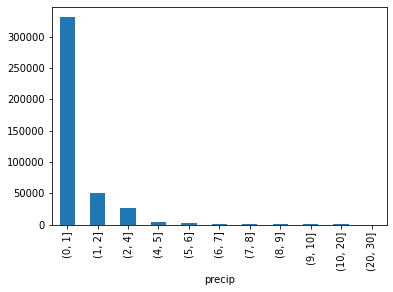

In [9]:
bins = [0,1,2,4,5,6,7,8,9,10,20,30]
data_bar_precip = Xtrain.groupby(pd.cut(Xtrain['precip'], bins=bins)).count()
data_bar_precip['precip'].plot.bar()

On voit avec ce diagramme en bâtons qu'il y a énormément de fois où il pleut très peu.

<AxesSubplot:>

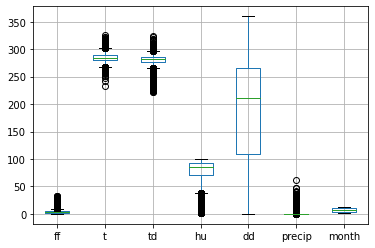

In [10]:
Xtrain.boxplot()

Ces boîtes à moustaches nous permettent d'évaluer les caractéristiques clés des variables explicatives.  
Les variables **ff,precip** ont des valeurs faibles proche de **0** comparer aux autres variables.  
Les variables **t,td,hu,dd** ont des valeurs majoritairement au dessus de **50**.

Matrice de corrélation de Xtrain.

In [14]:
corr_Xtrain = Xtrain.corr(method='pearson')
corr_Xtrain


,ff,t,td,hu,dd,precip,month
ff,1.000000,0.058643,-0.016959,-0.172687,0.201671,0.119734,-0.114946
t,0.058643,1.000000,0.843943,-0.569910,0.144818,-0.022993,0.173252
td,-0.016959,0.843943,1.000000,-0.052729,0.174139,0.044981,0.243252
hu,-0.172687,-0.569910,-0.052729,1.000000,-0.005359,0.119600,0.058531
dd,0.201671,0.144818,0.174139,-0.005359,1.000000,0.045052,0.011905
precip,0.119734,-0.022993,0.044981,0.119600,0.045052,1.000000,-0.023655
month,-0.114946,0.173252,0.243252,0.058531,0.011905,-0.023655,1.000000


  
On retrouve une corrélation négative entre la température et l'humidité ce qui semble logique.  
On constate aussi une forte corrélation positive entre la température et td

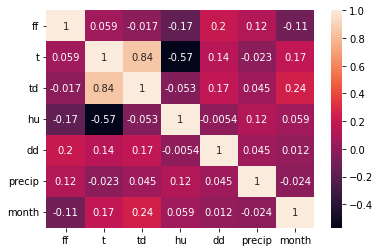

In [12]:
sns.heatmap(corr_Xtrain,annot=True)
plt.show()

Ce que l'on peut en tirer est qu'aucune variable n'est corrélé avec la variable **precip**.

ACP normée avec deux composantes principales


In [15]:
from sklearn.preprocessing import StandardScaler

Xtrain = Xtrain.fillna(method='ffill')
features = ['ff','t','td','hu','dd']

X_acp = Xtrain.loc[:,features].values
X_acp = StandardScaler().fit_transform(X_acp)


Y_acp = Xtrain.loc[:,'precip'].values



In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)

principalComponents = pca.fit_transform(X_acp)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

finalDf = pd.concat([principalDf, Xtrain[['precip']]], axis = 1)



On récupère les valeurs propres de nos composantes principales

In [17]:
pca.explained_variance_

array([1.86226586, 1.25663712, 0.97787122, 0.71903328, 0.18419365])

Notre première composante principale explique 37% de l'inertie tandis que la seconde composante principale explique 25 % de l'inertie.

In [18]:
pca.explained_variance_ratio_

array([0.37245309, 0.25132737, 0.1955742 , 0.14380662, 0.03683872])

Visualisation des valeurs propres de nos composantes principales. 

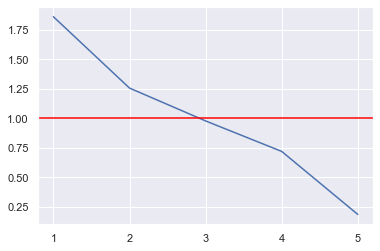

In [19]:

sns.set_theme(style='darkgrid')
graph_variance = sns.lineplot(x=['1','2','3','4','5'],y = pca.explained_variance_)
graph_variance.axhline(1,color= 'red')

On constate que les composantes principales 1 et 2 ont des valeurs propres supérieurs à 1.  
Tandis que la troisième composante principale à une valeur propre très proche de 1 c'est pourquoi on décide aussi de la garder pour la suite selon la règle de Kaiser.


In [20]:
display(finalDf)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,precip
0,1.466994,-0.120039,-0.221716,-0.514363,0.139778,0.0
1,1.637976,-0.289884,-0.217261,-0.537407,0.141746,0.0
2,1.791670,-0.409033,-0.222848,-0.529851,0.146857,0.0
3,1.913168,-0.476163,-0.282240,-0.242018,0.165365,0.0
4,2.035037,-0.208536,-0.363414,-0.270697,0.214705,0.0
...,...,...,...,...,...,...
4409469,-0.664325,0.998569,0.327438,0.513937,0.026701,0.0
4409470,-0.549742,0.839466,0.277978,0.474225,0.024837,0.0
4409471,-0.515125,0.873402,0.179495,0.568285,0.034254,0.0
4409472,-0.507336,0.915253,0.230610,0.645880,0.039194,0.0


S'il pleut, la variable class prend comme valeur 1, sinon elle prend comme valeur 2.


In [21]:
finalDf['class'] = np.where(finalDf['precip'] == 0,1,2)
display(finalDf)



,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,precip,class
0,1.466994,-0.120039,-0.221716,-0.514363,0.139778,0.0,1
1,1.637976,-0.289884,-0.217261,-0.537407,0.141746,0.0,1
2,1.791670,-0.409033,-0.222848,-0.529851,0.146857,0.0,1
3,1.913168,-0.476163,-0.282240,-0.242018,0.165365,0.0,1
4,2.035037,-0.208536,-0.363414,-0.270697,0.214705,0.0,1
...,...,...,...,...,...,...,...
4409469,-0.664325,0.998569,0.327438,0.513937,0.026701,0.0,1
4409470,-0.549742,0.839466,0.277978,0.474225,0.024837,0.0,1
4409471,-0.515125,0.873402,0.179495,0.568285,0.034254,0.0,1
4409472,-0.507336,0.915253,0.230610,0.645880,0.039194,0.0,1


Scatter plot avec les deux premières composantes principales

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

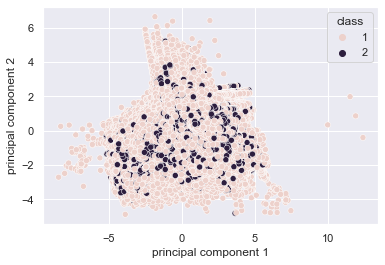

In [22]:
sns.scatterplot(data = finalDf,x= 'principal component 1', y = 'principal component 2', hue='class')

En 3 dimensions cela devient illisible.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


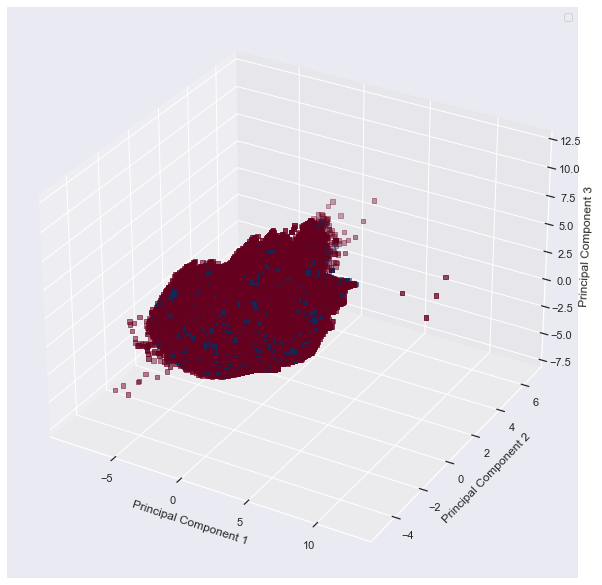

In [23]:
fig = plt.figure()
fig.set_size_inches(15, 10.5)
ax = fig.add_subplot(111, projection='3d')
x = np.array(finalDf['principal component 1'])
y = np.array(finalDf['principal component 2'])
z = np.array(finalDf['principal component 3'])
ax.scatter(x,y,z, marker="s", c=finalDf["class"], s=20, cmap="RdBu")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()